In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST and normalize

In [2]:
(X_train, _), (X_test, _) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0
X_train = np.expand_dims(X_train, -1)  # Add channel dimension
X_test = np.expand_dims(X_test, -1)

# Add Gaussian noise to images

In [3]:
noise_factor = 0.5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

# Build convolutional autoencoder

In [4]:
input_img = tf.keras.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D(2, padding='same')(x)
x = tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
x = tf.keras.layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D(2)(x)
decoded = tf.keras.layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)
 
autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder

In [5]:
autoencoder.fit(X_train_noisy, X_train, epochs=5, batch_size=128, shuffle=True, validation_split=0.1)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 0.3180 - val_loss: 0.1234
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 0.1201 - val_loss: 0.1155
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - loss: 0.1137 - val_loss: 0.1119
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 36ms/step - loss: 0.1106 - val_loss: 0.1091
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - loss: 0.1080 - val_loss: 0.1074


# Predict denoised images

In [6]:
decoded_imgs = autoencoder.predict(X_test_noisy[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


# Display original noisy vs. denoised

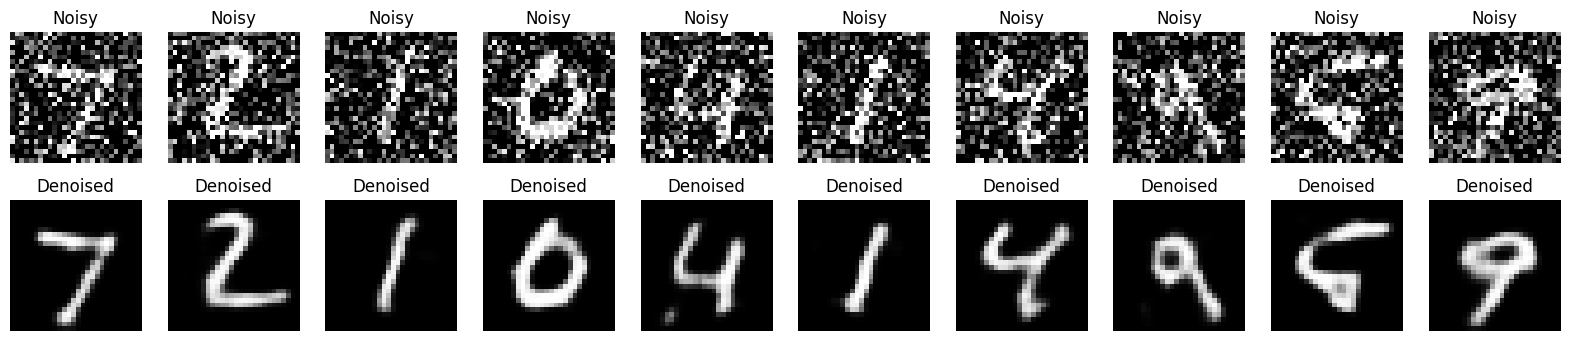

In [7]:
plt.figure(figsize=(20, 4))
for i in range(10):
    # Noisy
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test_noisy[i].squeeze(), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")
 
    # Denoised
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoded_imgs[i].squeeze(), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")
plt.show()